In [2]:
# Vi importerar det vi behöver

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# applichiamo uno stile piacevole alla vista e settiamo i parametri di visualizzazione
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [ ]:
# importiamo il dataset
boston = pd.read_csv('boston.csv')

# Eliminiamo la colonna Unnamed: 0 che non ci serve
del boston['Unnamed: 0']

# Facciamo una piccola ispezione del dataset per vedere se ci sono valori nulli o mancanti
print('informazioni sul dataset', '\n')
print(boston.info(), '\n')
print(boston.describe(), '\n')
print('controlliamo se ci sono dei valori nulli', '\n')
print(boston.isnull().sum())
print('\n')
# Controlliamo se ci sono valori anomali nei dati
corr = boston.corr(method="pearson")
print('Controlliamo se ci sono valori anomali nei dati', '\n')
print(corr)
print('stampiamo una mappa semplice delle correlazioni', '\n')
sns.heatmap(corr,annot=True)
plt.show()

PREPARAZIONE DEL DATASET PER LA REGRESSIONE LINEARE MULTIPLA


In [ ]:
# Dividiamo il dataset in due parti: X e y dove le X sono le features e y è la variabile target
# Per fare questo usiamo il metodo .iloc che ci permette di selezionare le colonne che ci servono
# e di trasformarle in un array numpy nella forma corretta per essere usate dagli algoritmi di ML
# ovvero una matrice di features e un vettore di target

# numero di colonne
n = len(boston.columns)

# selezioniamo le colonne che ci servono
# matrice della colonna di features
X = boston.iloc[:,0:n-1].values

# vettore della variabile target
y = boston.iloc[:,n-1].values.reshape(-1,1)

# stampiamo le dimensioni delle matrici
print("Matrice di features", X.shape)
print("Vettore target", y.shape)

In [5]:
# Settiamo il parametro random state per avere sempre gli stessi risultati
# quando facciamo la divisione in train e test set e quando usiamo l'algoritmo di ML
RANDOM_STATE = 40

REGRESSIONE LINEARE MULTIPLA

In [ ]:
# Testiamo il modello con il train test split e vediamo come si comporta
# dividiamo il dataset in train e test set con il metodo train_test_split di sklearn 
# e poi effettuiamo una regressione lineare multipla con il metodo LinearRegression di sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=RANDOM_STATE)

# Creiamo il modello di regressione lineare multipla
lr_model = LinearRegression()

# Adddestriamo il modello
lr_model.fit(X_train, y_train)

# Verifichiamo l'accuratezza del modello
print("Accuratezza del modello", '\n')
score_model = lr_model.score(X_test,y_test)
print("r2: ", score_model, '\n')

# Effettuiamo delle predizioni sul test set e calcoliamo l'accuratezza del modello
print('Accuratezza delle Previsioni', '\n')
y_pred = lr_model.predict(X_test)
# r2 
r2 = r2_score(y_test,y_pred)
print('r2: ', r2)

# Errore quadratico medio
mse = mean_squared_error(y_test,y_pred)
print("Errore quadratico medio: ", mse)

# Errore medio assoluto
mae = mean_absolute_error(y_test, y_pred)
print("Errore medio assoluto: ", mae)


In [ ]:
# visualizziamo i valori dei pesi e del bias trovati
print("Valore dei pesi:", lr_model.coef_[0])
print("Valore della intercetta:", lr_model.intercept_[0])

# stampiamo l'equazione della retta
print("Equazione della retta:", '\n')
for i in range(len(boston.columns)-1):
    print(boston.columns[i], "*", lr_model.coef_[0][i], "+")
print('Bias (intercetta)', lr_model.intercept_[0])

ALTRI METODI DI REGRESSIONE LINEARE MULTIPLA:

CROSS VALIDATION
 - https://it.wikipedia.org/wiki/Convalida_incrociata 

LASSO e RIDGE
 - https://www.sciano.net/post/3/lasso-vs-ridge-regression 

CONFRONTO PRELIMINARE DEI MODELLI CON LA CROSS VALIDATION

 - https://www.diariodiunanalista.it/posts/un-paradigma-per-la-selezione-del-modello/

In [10]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [11]:
models = []
models.append(('Lasso', linear_model.Lasso()))
models.append(('Ridge', linear_model.Ridge()))
models.append(('EN', linear_model.ElasticNet()))
models.append(('RandomForest', ensemble.RandomForestRegressor()))
models.append(('KNR', neighbors.KNeighborsRegressor()))
models.append(('DT', tree.DecisionTreeRegressor()))
models.append(('ET', tree.ExtraTreeRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('GBM', ensemble.GradientBoostingRegressor()))
models.append(("SVR", svm.LinearSVR()))

In [ ]:
from sklearn import model_selection

n_folds = 5 # numero di split 
results = [] # lista dove salvare le performance
names = [] # lista dove salvare i nomi dei modelli per la visualizzazione

# iniziamo il ciclo dove andremo a testare ogni modello
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    cv_results = model_selection.cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=kfold, 
        scoring="neg_mean_absolute_error", 
        verbose=0, 
        n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg+"\n")

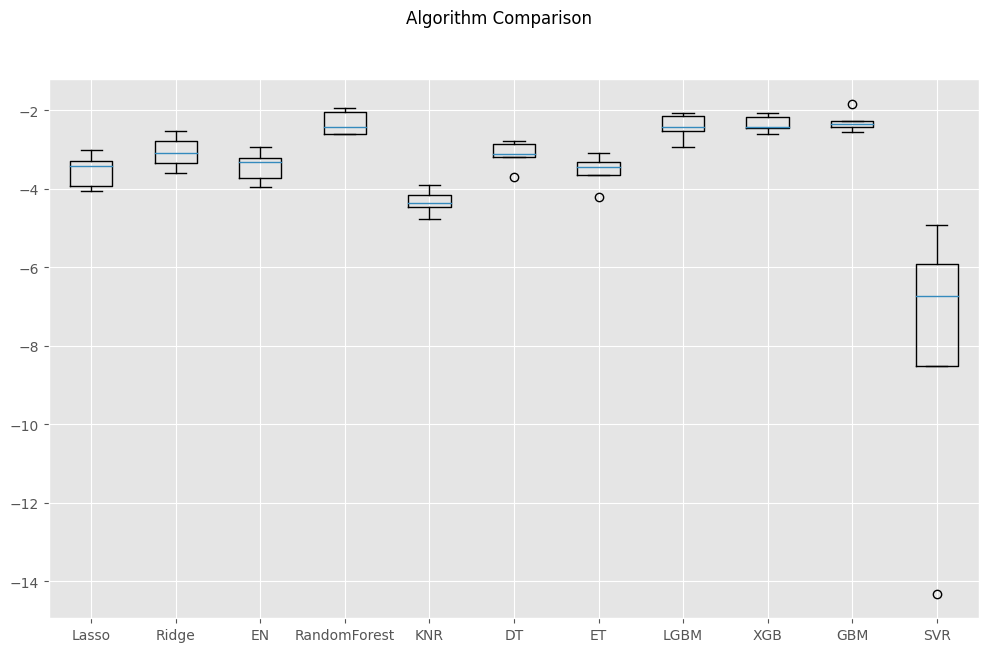

In [13]:
# Modelli messi a confronto
fig = plt.figure(figsize=(12,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

CROSS VALIDATION

In [14]:
# Testiamo il modello con la cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv = 5)
print("Accuratezza della cross validation: ", scores)
print("Accuratezza media della cross validation: ", scores.mean())

Accuratezza della cross validation:  [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Accuratezza media della cross validation:  0.35327592439588484


In [50]:
"""# Vi testar att göra en random forest regression
from xgboost import XGBRegressor

# Vi skapar en regressor
xgb_model = XGBRegressor(random_state=RANDOM_STATE)

# vi skapar en parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'gamma': [0.01, 0.1],
    'learning_rate': [0.001, 0.001, 0.01, 0.1, 1]
}

# Vi skapar en grid search
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(
                estimator=xgb_model,                      # model to train
                param_grid=param_grid,                    # parameter grid
                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                refit='r2',                               # best estimator based on r2
                cv=5,                                     # 5-fold cross validation
                verbose=4
                )

# Vi tränar grid modellen
GS.fit(X_train, y_train)"""

"# Vi testar att göra en random forest regression\nfrom xgboost import XGBRegressor\n\n# Vi skapar en regressor\nxgb_model = XGBRegressor(random_state=RANDOM_STATE)\n\n# vi skapar en parameter grid\nparam_grid = {\n    'n_estimators': [100, 200, 500],\n    'max_depth': [3, 6, 9],\n    'gamma': [0.01, 0.1],\n    'learning_rate': [0.001, 0.001, 0.01, 0.1, 1]\n}\n\n# Vi skapar en grid search\nfrom sklearn.model_selection import GridSearchCV\n\nGS = GridSearchCV(\n                estimator=xgb_model,                      # model to train\n                param_grid=param_grid,                    # parameter grid\n                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()\n                refit='r2',                               # best estimator based on r2\n                cv=5,                                     # 5-fold cross validation\n                verbose=4\n                )\n\n# Vi tränar grid modellen\nGS.fit(X_train, y_train)"

In [17]:
# Testiamo i due regressori Ridge e Lasso e usiamo due griglie di ricerca per trovare i migliori parametri
# con la cross validation
from sklearn.linear_model import Ridge, Lasso

# Creiamo la griglia di ricerca per il regressore Ridge e Lasso e usiamo la GridSearchCV di sklearn
param_grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV

In [16]:
# importiamo la libreria per la griglia di ricerca
from sklearn.model_selection import GridSearchCV

# Creiamo i due modelli di regressione Ridge e Lasso
Ridge_model = Ridge(random_state=RANDOM_STATE)
Lasso_model = Lasso(random_state=RANDOM_STATE)

Ridge

In [18]:
# Creiamo la griglia di ricerca per il regressore Ridge e calcoliamo i risultati
GS = GridSearchCV(
                estimator=Ridge_model,                    # modello da addestrare
                param_grid=param_grid,                    # grid di parametri
                scoring=['r2', 'neg_mean_squared_error'], # metriche di confronto sklearn.metrics.SCORERS.keys()
                refit='r2',                               # migliore estimatore basato su r2
                cv=5,                                     # cross validation a 5 fold
                verbose=False
                )

# Vi tränar grid modellen
GS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", GS.best_params_)
print("Grid search best score: ", GS.best_score_)
print("Grid search best estimator: ", GS.best_estimator_)
print("Grid search best index: ", GS.best_index_)
print('\n')
# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(GS.cv_results_)
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
# Vi printar ut de 10 bästa resultaten sorterade efter r2
print(result_grid.sort_values(by='rank_test_r2').head(1))
print('\n')

# Träna en modell med de bästa värdena

Ridge_model = Ridge(alpha=GS.best_params_["alpha"])
Ridge_model.fit(X_train, y_train)
y_pred = Ridge_model.predict(X_test)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Ridge score: ", Ridge_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred) 
rm = Ridge_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')


======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113878100615512
Grid search best estimator:  Ridge(alpha=0.001, random_state=40)
Grid search best index:  0


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001678      0.000925         0.001532        0.000228       0.001   

             params  split0_test_r2  split1_test_r2  split2_test_r2  \
0  {'alpha': 0.001}        0.661365        0.795602         0.65327   

   split3_test_r2  ...  std_test_r2  rank_test_r2  \
0        0.747758  ...     0.053758             1   

   split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
0                          -27.633243                          -12.781423   

   split2_test_neg_mean_squared_error  split3_test_neg_mean_squared_error  \
0                          -26.925256                          -1

Lasso

In [19]:
# Vi skapar en grid search
GS = GridSearchCV(
                estimator=Lasso_model,                      # model to train
                param_grid=param_grid,                    # parameter grid
                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                refit='r2',                               # best estimator based on r2
                cv=5,                                     # 5-fold cross validation
                verbose=False
                )

# Vi tränar grid modellen
GS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", GS.best_params_)
print("Grid search best score: ", GS.best_score_)
print("Grid search best estimator: ", GS.best_estimator_)
print("Grid search best index: ", GS.best_index_)
print('\n')

# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(GS.cv_results_)

# Vi printar ut de 10 bästa resultaten sorterade efter r2
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
print(result_grid.sort_values(by='rank_test_r2').head(1))
print('\n')

# Träna en modell med de bästa värdena

Lasso_model = Lasso(alpha=GS.best_params_["alpha"])
Lasso_model.fit(X_train, y_train)
y_pred = Lasso_model.predict(X_test)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Lasso score: ", Lasso_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred) 
rm = Lasso_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')

======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113017268913784
Grid search best estimator:  Lasso(alpha=0.001, random_state=40)
Grid search best index:  0


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001674      0.000431         0.000922        0.000159       0.001   

             params  split0_test_r2  split1_test_r2  split2_test_r2  \
0  {'alpha': 0.001}        0.661089        0.795673        0.653078   

   split3_test_r2  ...  std_test_r2  rank_test_r2  \
0        0.747955  ...      0.05391             1   

   split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
0                          -27.655763                          -12.776984   

   split2_test_neg_mean_squared_error  split3_test_neg_mean_squared_error  \
0                          -26.940182                          -1

RandomSearchCV

In [55]:
# importering av RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Vi skapar en regressor
Ridge_model = Ridge(random_state=RANDOM_STATE)
Lasso_model = Lasso(random_state=RANDOM_STATE)

Ridge

In [56]:
# Vi skapar en random search
RS = RandomizedSearchCV(estimator = Ridge_model,
                        param_distributions = param_grid,
                        n_iter = 5,
                        cv = 5,
                        verbose=False
                        )

# Vi tränar Random modellen
RS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", RS.best_params_)
print("Grid search best score: ", RS.best_score_)
print("Grid search best estimator: ", RS.best_estimator_)
print("Grid search best index: ", RS.best_index_)
print('\n')

# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(RS.cv_results_)

# Vi printar ut de 10 bästa resultaten sorterade efter r2
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
print(result_grid.sort_values(by='rank_test_score').head(1))
print('\n')

# Träna en modell med de bästa värdena

Ridge_model = Ridge(alpha=RS.best_params_["alpha"])
Ridge_model.fit(X_train, y_train)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Ridge score: ", Ridge_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred) 
rm = Ridge_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')

======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113878100615512
Grid search best estimator:  Ridge(alpha=0.001, random_state=40)
Grid search best index:  3


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
3        0.00106      0.000066         0.000715          0.0001       0.001   

             params  split0_test_score  split1_test_score  split2_test_score  \
3  {'alpha': 0.001}           0.661365           0.795602            0.65327   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
3           0.747758           0.698944         0.711388        0.053758   

   rank_test_score  
3                1  


======= Evaluatition of the model =================
Ridge score:  0.7215528660031915
R2 score:  0.7215519718844154
Difference:  -8.941187760180824e-07




Lasso

In [57]:
# Vi skapar en random search
RS = RandomizedSearchCV(estimator = Lasso_model,
                        param_distributions = param_grid,
                        n_iter = 5,
                        cv = 5,
                        verbose=False
                        )

# Vi tränar Random modellen
RS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", RS.best_params_)
print("Grid search best score: ", RS.best_score_)
print("Grid search best estimator: ", RS.best_estimator_)
print("Grid search best index: ", RS.best_index_)
print('\n')

# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(RS.cv_results_)

# Vi printar ut de 10 bästa resultaten sorterade efter r2
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
print(result_grid.sort_values(by='rank_test_score').head(1))
print('\n')

# Träna en modell med de bästa värdena

Lasso_model = Lasso(alpha=RS.best_params_["alpha"])
Lasso_model.fit(X_train, y_train)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Ridge score: ", Lasso_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred) 
rm = Lasso_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')

======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.01}
Grid search best score:  0.709907953677309
Grid search best estimator:  Lasso(alpha=0.01, random_state=40)
Grid search best index:  4


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
4       0.001774      0.000408         0.000751        0.000101        0.01   

            params  split0_test_score  split1_test_score  split2_test_score  \
4  {'alpha': 0.01}           0.657908           0.795946           0.650487   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
4           0.749248           0.695951         0.709908        0.055461   

   rank_test_score  
4                1  


======= Evaluatition of the model =================
Ridge score:  0.7215370887213186
R2 score:  0.7215519718844154
Difference:  1.4883163096834906e-05


